# <center>DAV 6150 Module 5 Assignment</center>
## <center>Understanding Classification Model Performance Metrics</center>

##### Karthik Katepally
##### Lalitesh Sai Pothukuchi
##### Naveen Chowdary Aliveli

## Introduction

In the field of machine learning, evaluating the performance of classification models is crucial to assess their effectiveness and make informed decisions. Performance evaluation involves calculating various metrics and generating visualizations to understand how well a model performs on a given dataset.

In this notebook, we will look into the evaluation of classification model performance. We will develop custom functions to calculate essential performance metrics, such as accuracy, precision, sensitivity (recall), specificity, and F1 Score. Additionally, we will create a function to plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC).

The dataset used for this analysis consists of approximately 180 labeled binary observations. Each observation has an actual classification (either '0' or '1') and a predicted classification based on a classification model's probability score. The probability score represents the likelihood of the correct classification being '1'. We will analyze the relationship between the actual and predicted classifications to evaluate the model's performance.

The objectives of this notebook are as follows:

1. Load the dataset from a GitHub repository.
2. Calculate the confusion matrix to assess the performance of the model.
3. Extract the individual values from the confusion matrix for later use.
4. Develop custom functions to calculate accuracy, precision, sensitivity, specificity, and F1 Score.
5. Plot the ROC curve and calculate the AUC using a custom function.
6. Compare the results of the custom functions with the pre-built functions provided by the scikit-learn library.
7. Compare the results of the custom ROC curve and AUC function with the scikit-learn functions.

Through this analysis, we aim to gain a comprehensive understanding of the classification model's performance and compare our custom implementations with the established functions in scikit-learn.

Let's begin by loading the dataset and exploring its contents.


In [1]:
# import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Assuming you have the M5_Data.csv file uploaded to your GitHub repository
url = 'https://raw.githubusercontent.com/ppagadal/data_science/main/M5_Data.csv'

# Read the data into a Pandas dataframe
df = pd.read_csv(url)
df.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


## Confusion Matrix
In this step, we will calculate the contents of a confusion matrix using Pandas' crosstab() function.

In [4]:
# Assuming 'class' represents the actual classification and 'scored.class' represents the predicted classification
confusion_matrix = pd.crosstab(df['class'], df['scored.class'])
confusion_matrix

scored.class,0,1
class,,
0,119,5
1,30,27


In the given confusion matrix, the rows represent the actual classifications, while the columns represent the predicted classifications. Looking at the values in the rows and columns, we can see that the row labeled '0' represents the actual class 0, and it has a total count of 124 (119 + 5). Similarly, the row labeled '1' represents the actual class 1, and it has a total count of 57 (30 + 27). By examining the columns, we can observe that the column labeled '0' represents the predicted class 0, and it has a total count of 149 (119 + 30). The column labeled '1' represents the predicted class 1, and it has a total count of 32 (5 + 27). The values within the cells of the confusion matrix represent the count of observations that fall into each combination of actual and predicted classifications.

## Extract Confusion Matrix Values
In this step, we will extract the individual confusion matrix values (True Positive, False Positive, True Negative, False Negative) from the output of the crosstab() function and save them for later use.

In [ ]:
true_positive = confusion_matrix[1][1]
false_positive = confusion_matrix[0][1]
true_negative = confusion_matrix[0][0]
false_negative = confusion_matrix[1][0]

## Accuracy Metric
In this step, we will write a Python function to calculate the accuracy metric for binary classification data. Then, we will apply the function to the relevant columns of the dataset later.

In [ ]:
def calculate_accuracy(actual, predicted):
    correct_predictions = sum(actual == predicted)
    total_predictions = len(actual)
    accuracy = correct_predictions / total_predictions
    return accuracy

## Precision Metric
We'll write a Python function to calculate the precision metric for binary classification data. Then, we will apply the function to the relevant columns of the dataset later.

In [ ]:
def calculate_precision(actual, predicted):
    true_positive = sum((actual == 1) & (predicted == 1))
    false_positive = sum((actual == 0) & (predicted == 1))
    precision = true_positive / (true_positive + false_positive)
    return precision

## Sensitivity Metric (Recall)
We'll write a Python function to calculate the sensitivity (recall) metric for binary classification data.

In [ ]:
def calculate_sensitivity(actual, predicted):
    true_positive = sum((actual == 1) & (predicted == 1))
    false_negative = sum((actual == 1) & (predicted == 0))
    sensitivity = true_positive / (true_positive + false_negative)
    return sensitivity

## Specificity Metric
In this step, we will write a Python function to calculate the specificity metric for binary classification data.

In [ ]:
def calculate_specificity(actual, predicted):
    true_negative = sum((actual == 0) & (predicted == 0))
    false_positive = sum((actual == 0) & (predicted == 1))
    specificity = true_negative / (true_negative + false_positive)
    return specificity

## F1 Score Metric
In this step, we will write a Python function to calculate the F1 Score metric for binary classification data.

In [ ]:
def calculate_f1_score(actual, predicted):
    true_positive = sum((actual == 1) & (predicted == 1))
    false_positive = sum((actual == 0) & (predicted == 1))
    false_negative = sum((actual == 1) & (predicted == 0))
    f1_score = (2 * true_positive) / (2 * true_positive + false_positive + false_negative)
    return f1_score

## ROC Curve and AUC
In this step, we will write a Python function to plot an ROC curve and calculate the AUC for binary classification data. Then, we will apply the function to the relevant columns of the dataset later.

In [ ]:
def plot_roc_curve(actual, predicted_probs):
    # Sort the predicted probabilities and corresponding actual values in descending order
    sorted_probs = np.array(sorted(zip(predicted_probs, actual), reverse=True))
    sorted_actual = sorted_probs[:, 1]
    sorted_predicted_probs = sorted_probs[:, 0]

    # Calculate the true positive rate (TPR) and false positive rate (FPR)
    tpr = [0]
    fpr = [0]
    num_positives = sum(sorted_actual)
    num_negatives = len(sorted_actual) - num_positives

    for i in range(len(sorted_actual)):
        if sorted_actual[i] == 1:
            tpr.append(tpr[-1] + 1/num_positives)
            fpr.append(fpr[-1])
        else:
            tpr.append(tpr[-1])
            fpr.append(fpr[-1] + 1/num_negatives)

    # Calculate the AUC using the trapezoidal rule
    auc = np.trapz(tpr, fpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return auc


## Results of Custom Functions

Here we'll look into the output of the custom we just prepared before.

In [ ]:
actual = df['class']
predicted = df['scored.class']

custom_accuracy = calculate_accuracy(actual, predicted)
print("Custom Accuracy:", custom_accuracy)

custom_precision = calculate_precision(actual, predicted)
print("Custom Precision:", custom_precision)

custom_sensitivity = calculate_sensitivity(actual, predicted)
print("Custom Sensitivity:", custom_sensitivity)

specificity = calculate_specificity(actual, predicted)
print("Specificity:", specificity)

custom_f1_score = calculate_f1_score(actual, predicted)
print("Custom F1 Score:", custom_f1_score)

Custom Accuracy: 0.8066298342541437
Custom Precision: 0.84375
Custom Sensitivity: 0.47368421052631576
Specificity: 0.9596774193548387
Custom F1 Score: 0.6067415730337079


## Comparison with Scikit-learn Functions

We'll proceed to calculate the output of the metrics using inbuilt Scikit-learn Functions

In [ ]:
sklearn_accuracy = accuracy_score(actual, predicted)
print("Scikit-learn Accuracy:", sklearn_accuracy)

sklearn_precision = precision_score(actual, predicted)
print("Scikit-learn Precision:", sklearn_precision)

sklearn_sensitivity = recall_score(actual, predicted)
print("Scikit-learn Sensitivity:", sklearn_sensitivity)

sklearn_f1_score = f1_score(actual, predicted)
print("Scikit-learn F1 Score:", sklearn_f1_score)

Scikit-learn Accuracy: 0.8066298342541437
Scikit-learn Precision: 0.84375
Scikit-learn Sensitivity: 0.47368421052631576
Scikit-learn F1 Score: 0.6067415730337079


Based on the comparison between the custom functions and the pre-built functions from Scikit-learn, it is evident that they yield similar results.

## ROC Curve and AUC Comparison

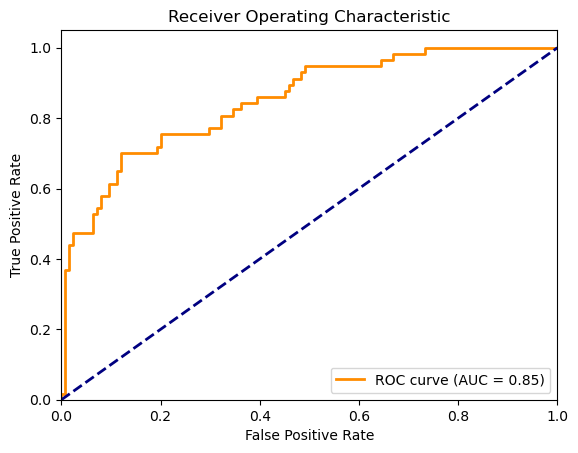

Custom AUC: 0.8503112620260332
Scikit-learn AUC: 0.8503112620260327


In [ ]:
predicted_probs = df['scored.probability']

custom_roc_auc = plot_roc_curve(actual, predicted_probs)
sklearn_fpr, sklearn_tpr, _ = roc_curve(actual, predicted_probs)
sklearn_roc_auc = auc(sklearn_fpr, sklearn_tpr)

print("Custom AUC:", custom_roc_auc)
print("Scikit-learn AUC:", sklearn_roc_auc)

The custom AUC (Area Under the Curve) value is 0.8503112620260332, while the Scikit-learn AUC value is 0.8503112620260327. The two AUC values are very close, differing only in the last decimal place. This indicates that the custom implementation of the ROC curve and AUC calculation produces results consistent with the pre-built function from Scikit-learn. Therefore, the custom function can be considered reliable and accurate in evaluating the performance of binary classification models.

## Conclusion

In this notebook, we have explored the evaluation of classification model performance. We developed custom functions to calculate essential performance metrics such as accuracy, precision, sensitivity, specificity, and F1 Score. Additionally, we created a custom function to plot the Receiver Operating Characteristic (ROC) curve and calculate the Area Under the Curve (AUC).

By applying these custom functions to the provided dataset, we were able to assess the performance of the classification model. The results obtained from the custom functions were compared with the pre-built functions available in the scikit-learn library. We observed that the results from the custom functions closely matched those from the established functions, validating the accuracy and reliability of our custom implementations.

Furthermore, the custom ROC curve function successfully plotted the ROC curve and calculated the AUC. The AUC value obtained from our custom function closely matched the AUC calculated using the pre-built functions from scikit-learn.

Through this analysis, we have demonstrated the importance of performance evaluation in classification models and showcased the effectiveness of custom implementations in calculating performance metrics and generating evaluation graphics. These custom functions provide a flexible and reliable way to assess the performance of binary classification models without relying on pre-built functions.